# Нейросеть для интерполяции функции расчета SAR

## Импорт библиотек

In [1]:
%%capture
%pip install --upgrade pip

In [2]:
# %%capture
%pip install tensorflow
%pip install sklearn
%pip install pydot graphviz 

Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2024-11-26 07:41:16.038554: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 07:41:16.039999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 07:41:16.043558: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 07:41:16.052929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732606876.068531   13520 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732606876.07

## Загрузка данных

In [4]:
data = pd.read_csv("SAR.csv", sep=";", decimal=",")
data["H(m)"] = data["H(m)"].apply(lambda x: x.replace(",", ".")).astype(float)
data.head()

,dT(grad),H(m),G(kg),M,SAR(km/kg)
0,0,10668.0,28000,0.45,0.469109
1,0,10668.0,28000,0.46,0.481677
2,0,10668.0,28000,0.47,0.493368
3,0,10668.0,28000,0.48,0.504628
4,0,10668.0,28000,0.49,0.514852


In [5]:
data_filtered = data[data["SAR(km/kg)"] > 0]

## Подготовка данных

In [6]:
X = data_filtered[["dT(grad)", "H(m)", "G(kg)", "M"]].values
y = data_filtered["SAR(km/kg)"].values

## Нормализация данных

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
scaler_y = StandardScaler()
scaler_y.fit(y.reshape(-1, 1))
y = scaler_y.transform(y.reshape(-1, 1))

## Разделение данных на обучающие и тестовые

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Создание нейросети

In [10]:
# model = keras.models.load_model("models/sar_nn.keras")
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(shape=(4,)))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

2024-11-26 07:41:18.226546: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

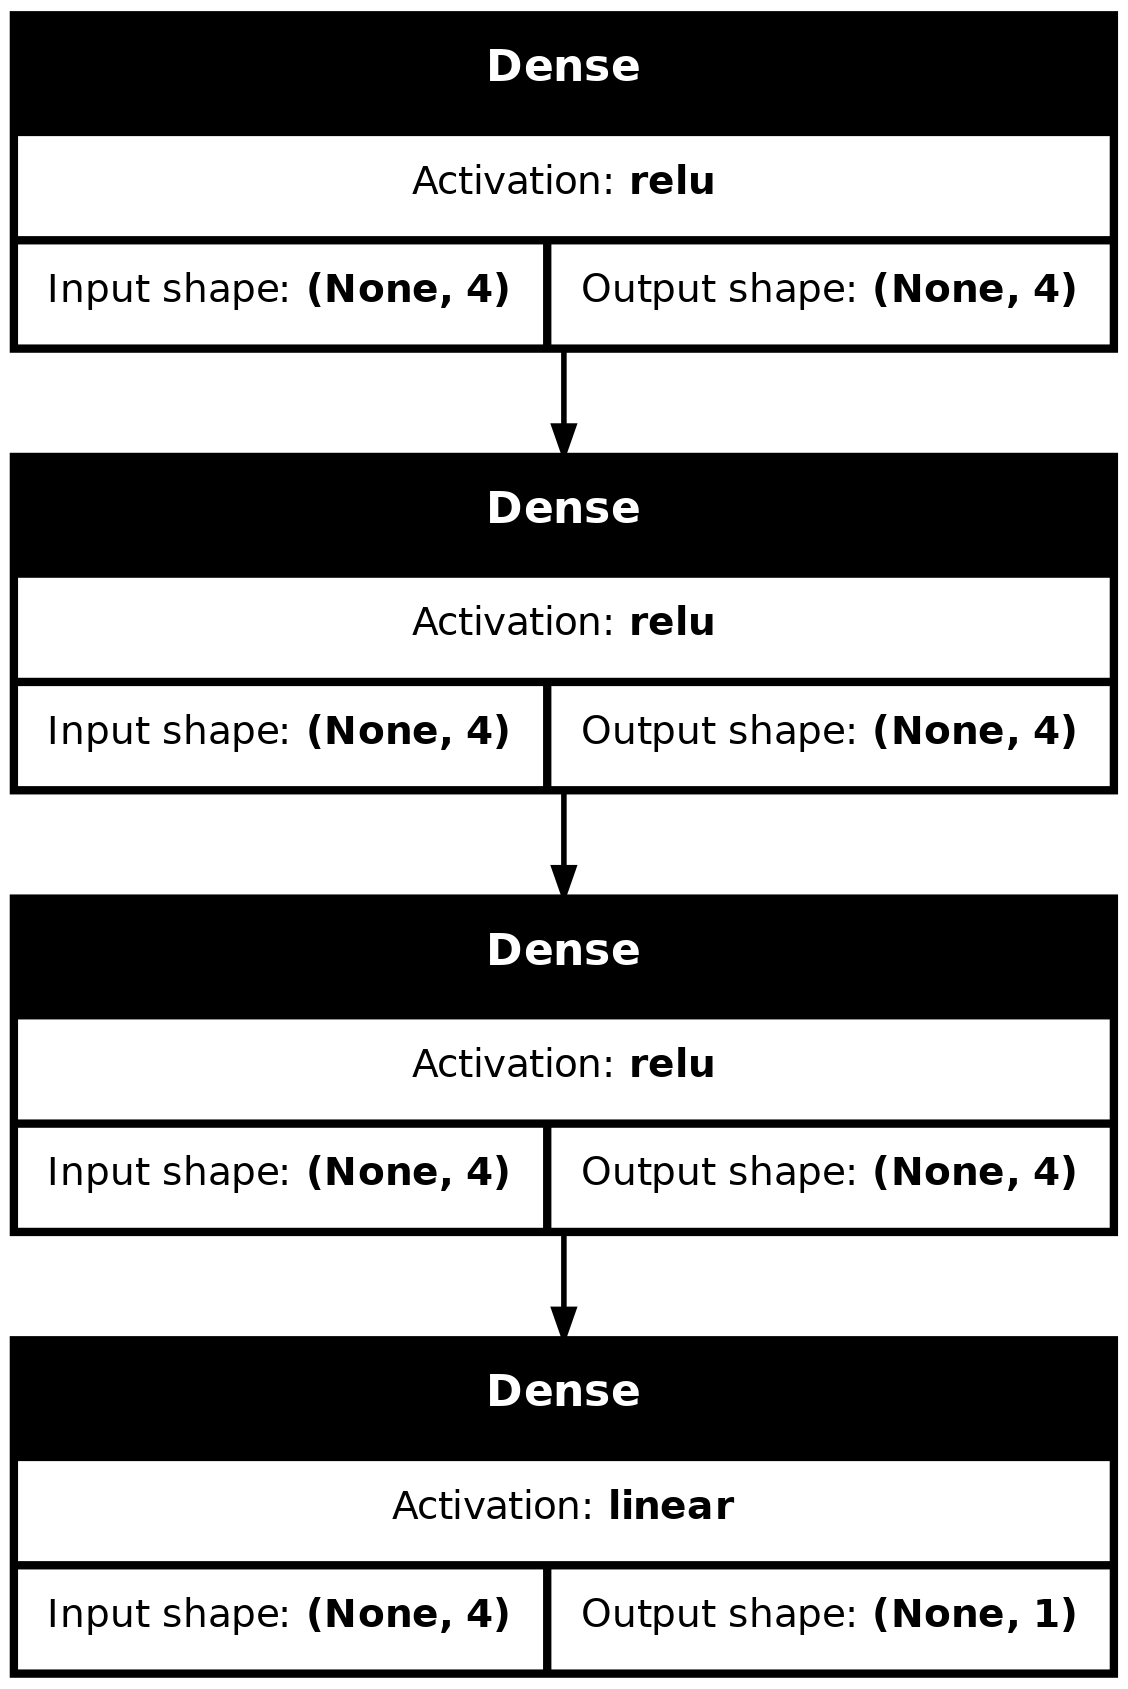

In [15]:
keras.utils.plot_model(model, to_file='sar_nn.png', show_shapes=True, show_layer_activations=True)

## Обучение нейросети

In [17]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
 53/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0140

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 0.0140
Epoch 2/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0137
Epoch 3/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.0146
Epoch 4/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.0140
Epoch 5/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133
Epoch 6/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0135
Epoch 7/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.0134
Epoch 8/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.0139
Epoch 9/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.0129
Epoch 10/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.0132
Epoch 11/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0131
Epoch 12/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.0129
Epoch 13/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0127
Epoch 14/1000
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0132
Epoch 15/1000
16

## График обучения

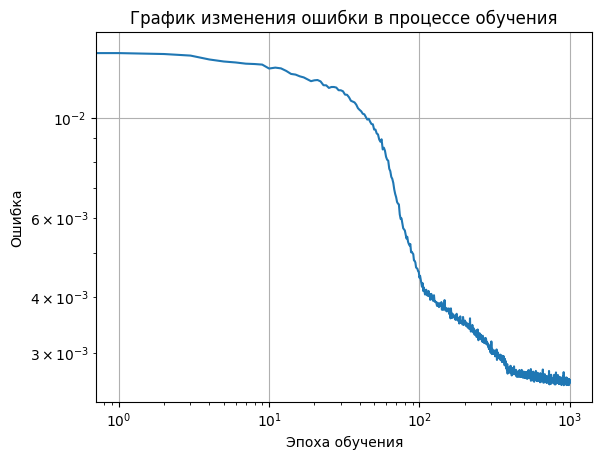

In [18]:
plt.plot(history.history['loss'])
plt.title('График изменения ошибки в процессе обучения')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.show()

## Проверка качества обучения

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


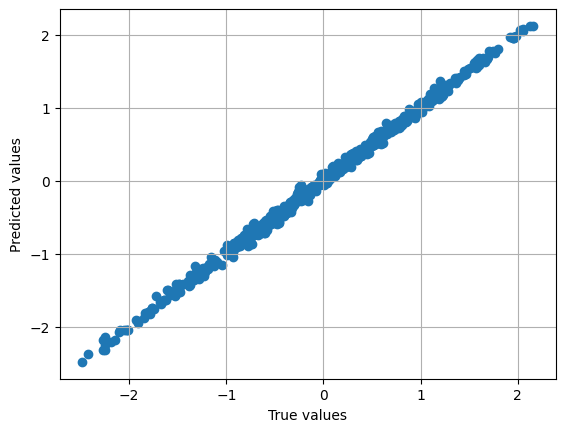

In [20]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.grid()
plt.show()

## Проверка ошибки

In [21]:
input_df = pd.DataFrame(scaler.inverse_transform(X_test), columns=["dT", "H", "G", "M"])
res_df = pd.DataFrame(
    {
        "SAR (True)": scaler_y.inverse_transform(y_test).flatten(),
        "SAR (Predicted)": scaler_y.inverse_transform(y_pred).flatten(),
    }
)
res_df["Error"] = res_df["SAR (True)"] - res_df["SAR (Predicted)"]
res_df["Error %"] = abs(res_df["Error"] / res_df["SAR (True)"] * 100)
res_df = pd.merge(input_df, res_df, left_index=True, right_index=True)
res_df

,dT,H,G,M,SAR (True),SAR (Predicted),Error,Error %
0,20.0,12192.0,30000.0,0.79,0.577685,0.580122,-0.002437,0.421845
1,0.0,11887.2,32000.0,0.61,0.539262,0.542458,-0.003196,0.592584
2,10.0,12192.0,30000.0,0.58,0.544323,0.544251,0.000072,0.013190
3,10.0,10668.0,40000.0,0.65,0.464733,0.465847,-0.001114,0.239647
4,5.0,10668.0,50000.0,0.66,0.371018,0.368810,0.002208,0.595152
...,...,...,...,...,...,...,...,...
565,5.0,10668.0,40000.0,0.63,0.455504,0.453916,0.001588,0.348628
566,5.0,10668.0,46000.0,0.82,0.406607,0.407645,-0.001038,0.255236
567,10.0,12192.0,28000.0,0.65,0.619698,0.619298,0.000400,0.064531
568,0.0,10668.0,46000.0,0.73,0.442849,0.442755,0.000094,0.021297


In [22]:
res_df.describe()

,dT,H,G,M,SAR (True),SAR (Predicted),Error,Error %
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,9.552632,11354.067368,36719.298246,0.681684,0.494424,0.495002,-0.000578,0.519503
std,7.146585,586.548508,6870.774013,0.086366,0.064080,0.064180,0.003179,0.444488
min,0.000000,10668.000000,28000.000000,0.460000,0.334468,0.334753,-0.011120,0.001549
25%,5.000000,10668.000000,30000.000000,0.620000,0.448286,0.448669,-0.002610,0.204435
50%,10.000000,11277.600000,36000.000000,0.690000,0.497065,0.498054,-0.000549,0.399939
75%,15.000000,11887.200000,42000.000000,0.750000,0.544663,0.544806,0.001506,0.680299
max,20.000000,12192.000000,52000.000000,0.820000,0.632880,0.630349,0.008260,2.543900


## Сохранение модели

In [23]:
model.save("sar_nn.keras")